In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 46.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 68.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from pycaret.regression import *
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 12)

In [4]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [5]:
train_data.head(12)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Change type of 'MSSubClass' from numerical to categorical

train_data['MSSubClass'] = train_data['MSSubClass'].astype(str)

# Split data into categorigal, numerical and target and remove Id and SalePrice

target = train_data['SalePrice']
train_data = train_data.drop(['Id', 'SalePrice'], axis=1)
cat_data = train_data.select_dtypes('object')
num_data = train_data.select_dtypes(np.number)

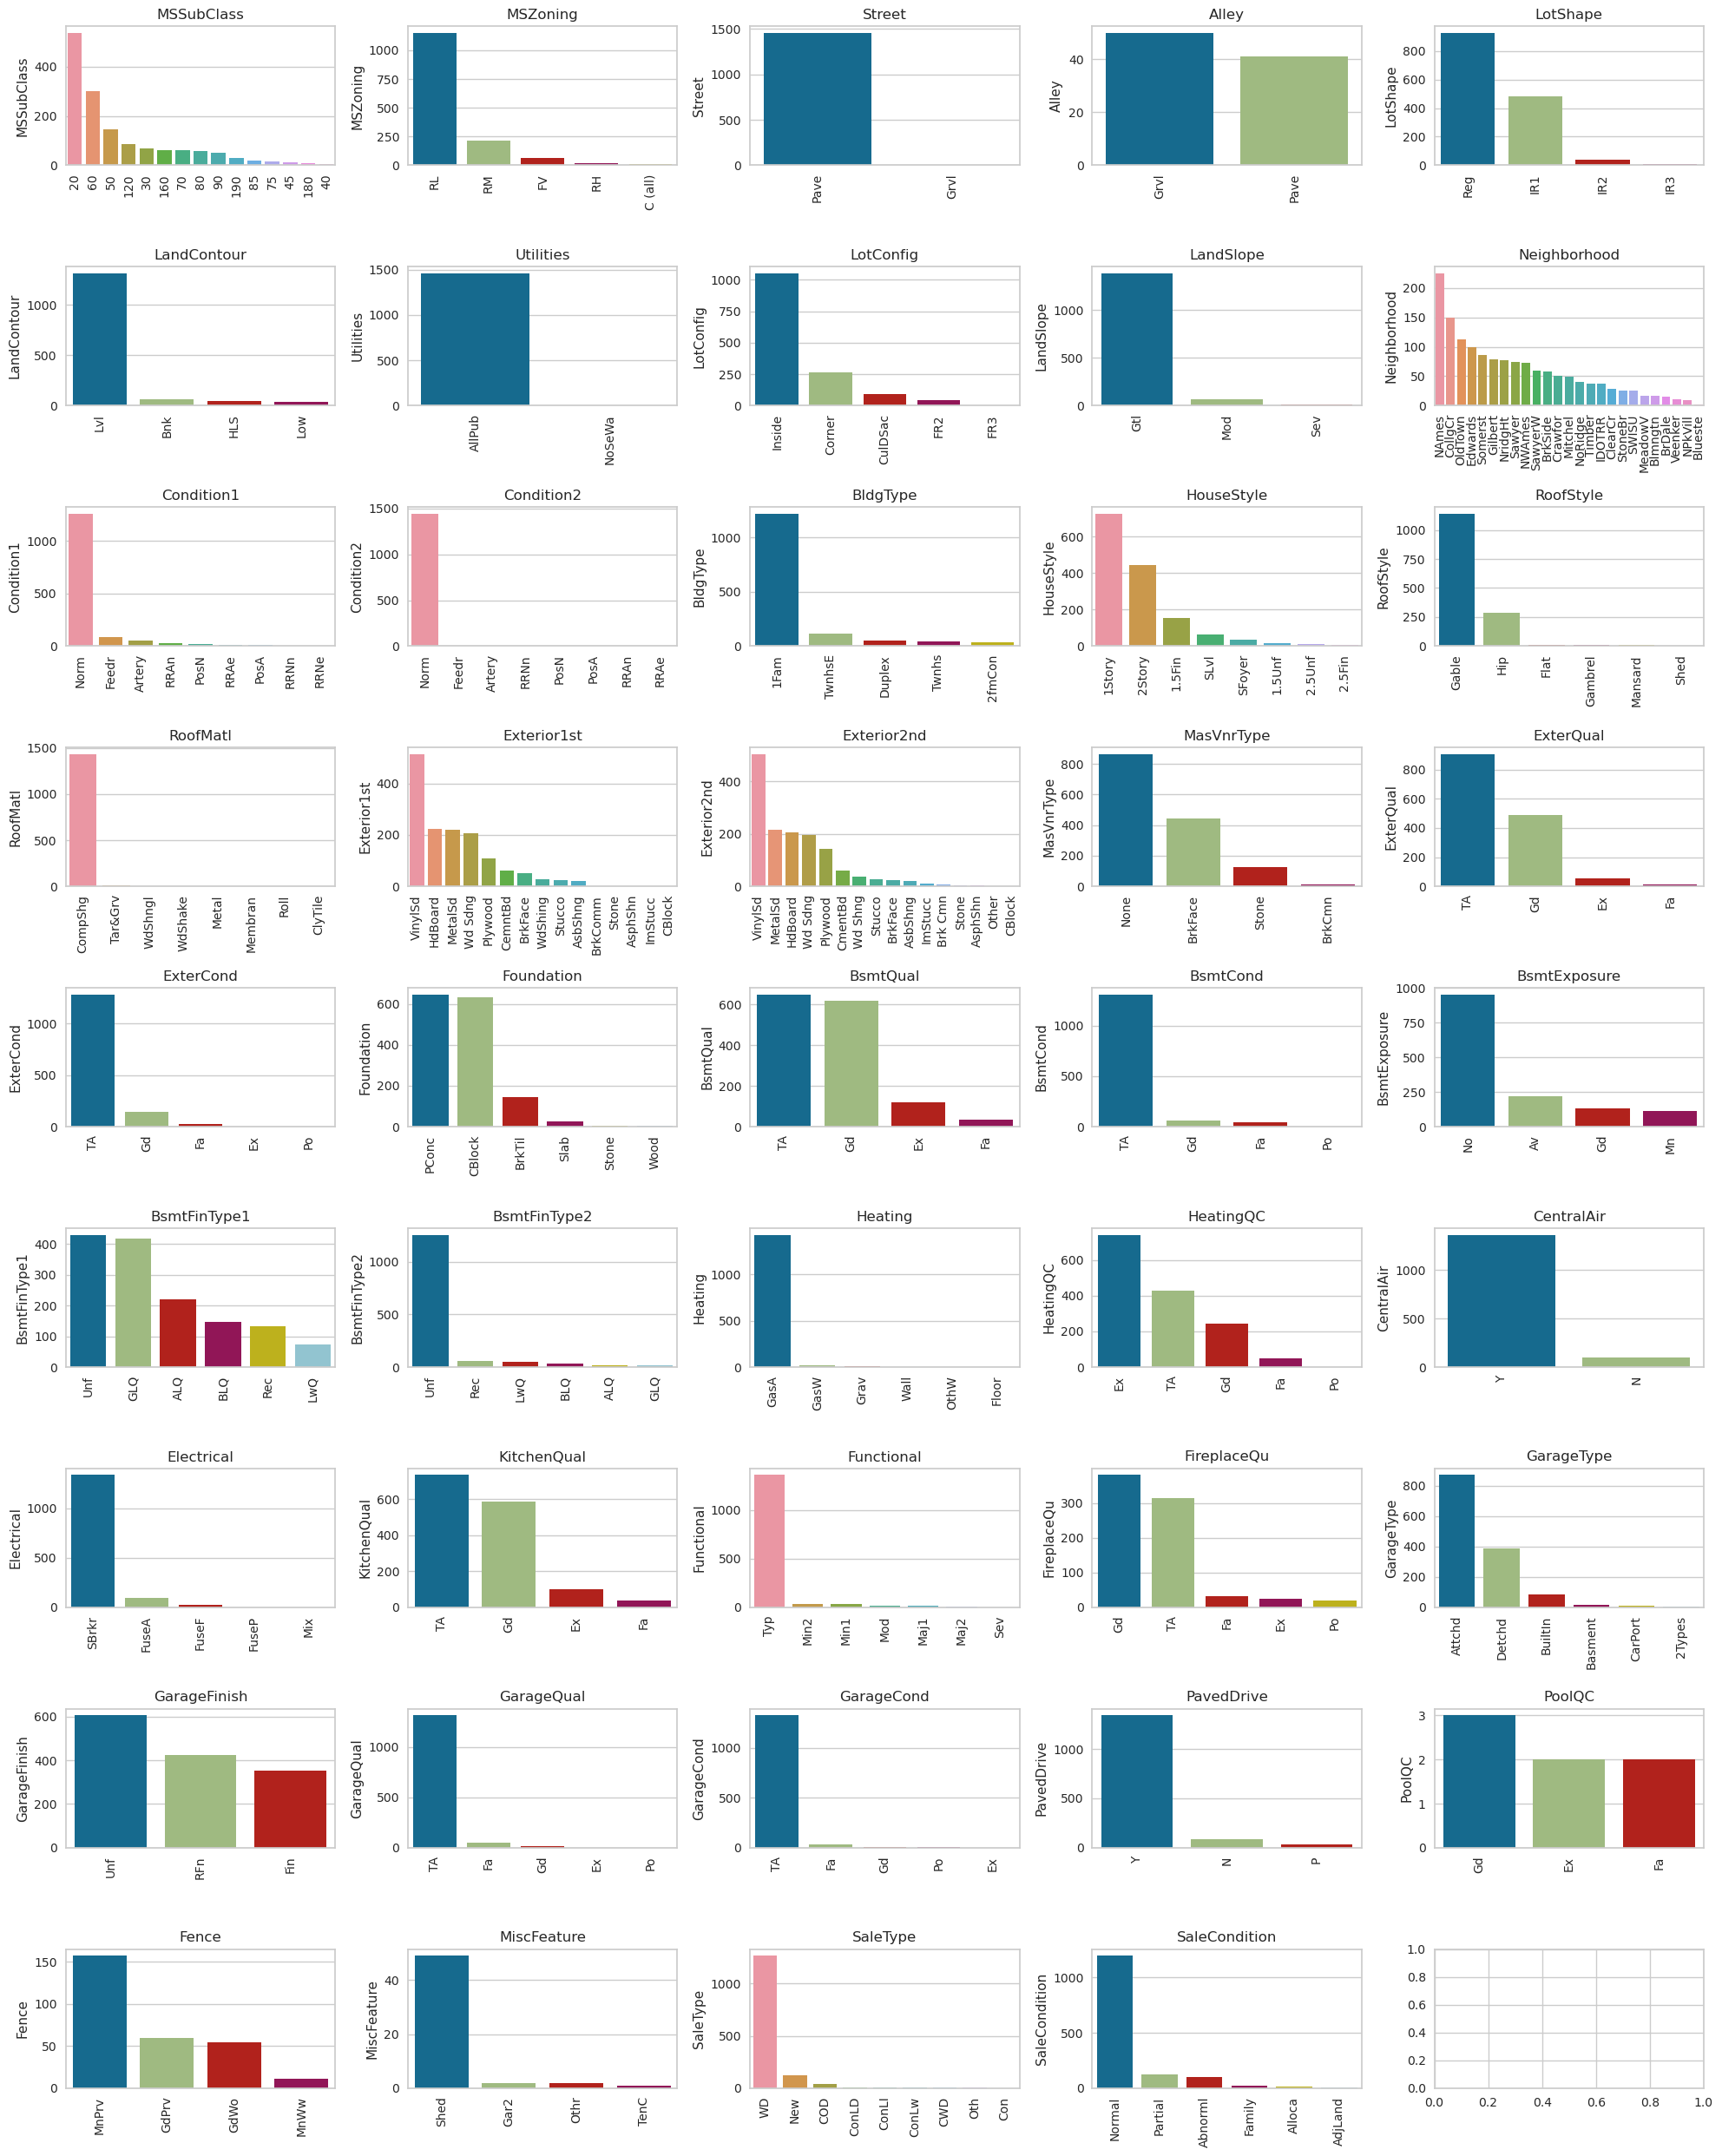

In [9]:
# Visulize the categorical data

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, column in enumerate(cat_data):
    ax = axes[i // 5, i % 5]
    sns.barplot(data=cat_data, x=cat_data[column].value_counts().index, y=cat_data[column].value_counts(), ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_title(column)
    

plt.tight_layout()
plt.show()

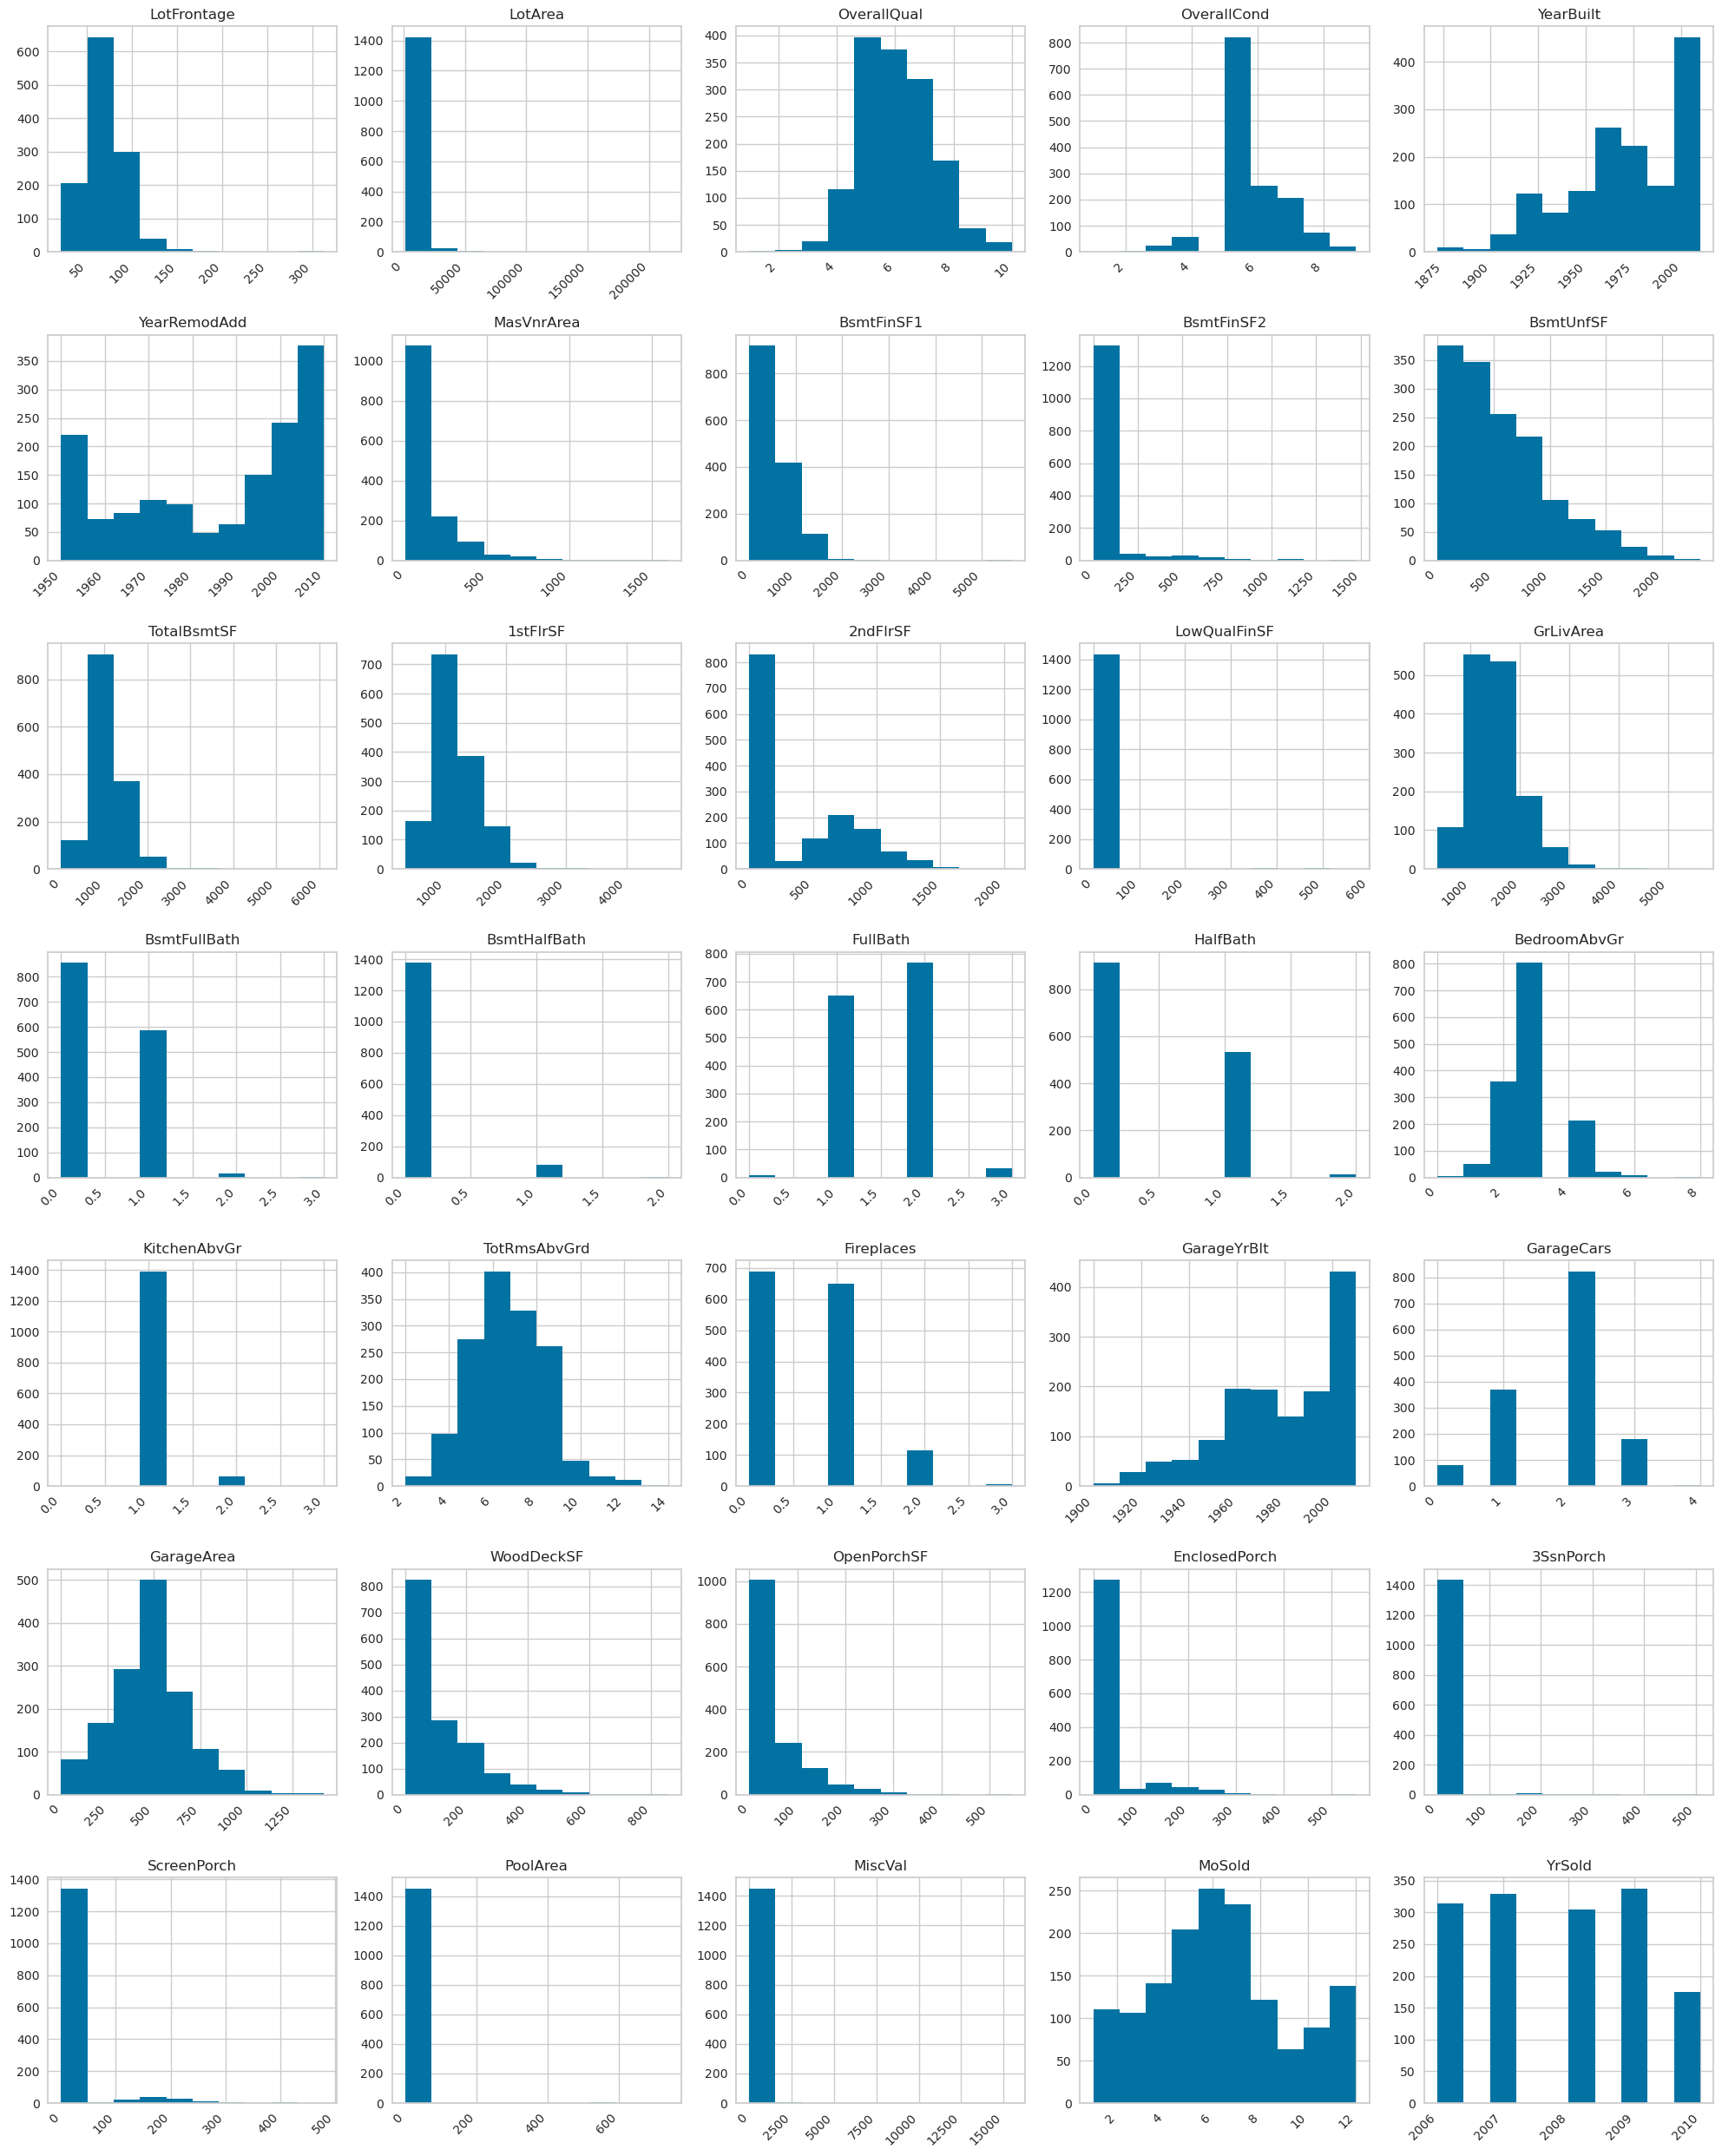

In [10]:
# Visulize the numerical data

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, column in enumerate(num_data):
    ax = axes[i // 5, i % 5]
    num_data[column].hist(bins=10, ax=ax)
    ax.set_title(column)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:
# Data cleaning and pre-processing data

# Check info of categorical data (missing values)

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  RoofStyle      1460 non-null   object
 15  RoofMatl       1460 non-null   object
 16  Exterior1st    1460 non-null   object
 17  Exterior2nd    1460 non-null   object
 18  MasVnrType     1452 non-null

In [12]:
# Replace missing values with 'None' in the categorical data

for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageQual',
    'GarageFinish',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    train_data[column] = train_data[column].replace(np.nan, 'None')
    
# Replace missing values with most frequent value in the categorical data

for column in [
     'Electrical',
     'MasVnrType'
]:
    train_data[column] = train_data[column].fillna(train_data[column].mode()[0])
train_data.select_dtypes('object').isna().sum().sum()

0

In [13]:
# Check info of numerical data (missing values)

num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath

In [14]:
# Create a Knn regressor which looks at surrounding data points and fills in based on them

def knn_imp(df, na_target):
    df = df.copy()
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [15]:
for column in [
    'MasVnrArea',
    'GarageYrBlt'
]:
     
    train_data = knn_imp(train_data, column)


In [16]:
train_data.isna().sum().sum()

259

In [17]:
# Address LotFrontage missing values

# Sort data by Area and impute the missing values in Frontage using the mean of 2 values before and 2 values after

pd.options.mode.chained_assignment = None

train_data = train_data.sort_values(by='LotArea')
train_data['LotFrontage' + '_imputed'] = train_data['LotFrontage']

for i in train_data[train_data['LotFrontage'].isna()].index:  
    if (i > 0) and (i < len(train_data)-1):  
        mean_value = np.mean([train_data['LotFrontage'][i-1], train_data['LotFrontage'][i+1]])   
        train_data['LotFrontage' + '_imputed'][i] = mean_value


train_data['LotFrontage'] = train_data['LotFrontage' + '_imputed']
train_data = train_data.drop(columns=['LotFrontage' + '_imputed'])
print(train_data['LotFrontage'].isna().value_counts())

False    1394
True       66
Name: LotFrontage, dtype: int64


In [18]:
for column in train_data.LotFrontage:
    
    # Fill missing values with the previous non-missing value
    
    train_data['LotFrontage'].fillna(method='ffill', inplace=True)
    
print(train_data['LotFrontage'].isna().value_counts())

False    1460
Name: LotFrontage, dtype: int64


In [19]:
# # Address the rest of the numerical missing values

# # Replace the missing values in GarageYrBlt with values from YearBuilt

# train_data['GarageYrBlt'].fillna(0, inplace=True)

# # Replace the missing values in MasVnrArea with 0
    
# train_data['MasVnrArea'].fillna(0, inplace=True)

# # Check if there are missiing values left

# train_data.isna().sum().sum()

               LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.291906     0.217734    -0.054441   0.113205   
LotArea           0.291906  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.217734  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.054441 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.113205  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.069099  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.171234  0.103498     0.413702    -0.129254   0.317072   
BsmtFinSF1        0.204898  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.042062  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.115661 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.344983  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.398461  0.299475     0.476224    -0.144203   0.281986   

<AxesSubplot:>

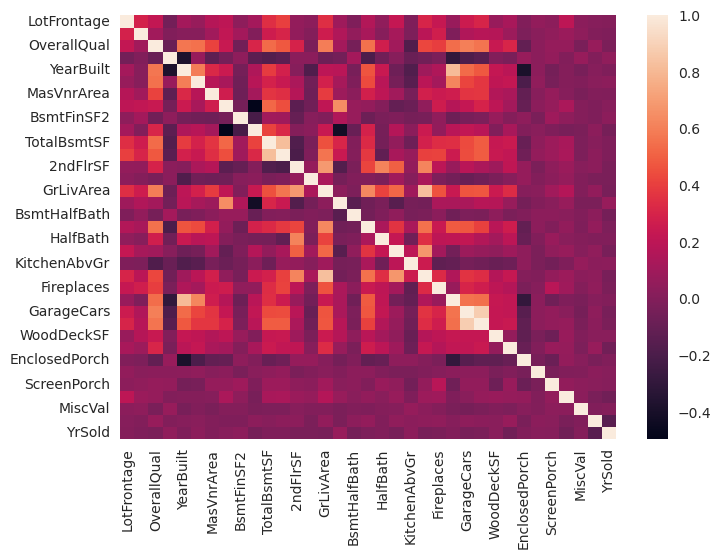

In [20]:
# Check the correlation between the numerical data

pd.set_option('display.max_rows', 37)
import seaborn as sns
print(train_data.select_dtypes(np.number).corr())
sns.heatmap(train_data.select_dtypes(np.number).corr())

In [21]:
# Check if the numerical data is skewed

skew = pd.DataFrame(abs(num_data.skew()))
print(skew)
to_be_transformed = []

for index,row in skew.iterrows():
    if row[0] >= 0.5:
        to_be_transformed.append(index)
to_be_transformed        

                       0
LotFrontage     2.163569
LotArea        12.207688
OverallQual     0.216944
OverallCond     0.693067
YearBuilt       0.613461
YearRemodAdd    0.503562
MasVnrArea      2.669084
BsmtFinSF1      1.685503
BsmtFinSF2      4.255261
BsmtUnfSF       0.920268
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
LowQualFinSF    9.011341
GrLivArea       1.366560
BsmtFullBath    0.596067
BsmtHalfBath    4.103403
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
KitchenAbvGr    4.488397
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt     0.649415
GarageCars      0.342549
GarageArea      0.179981
WoodDeckSF      1.541376
OpenPorchSF     2.364342
EnclosedPorch   3.089872
3SsnPorch      10.304342
ScreenPorch     4.122214
PoolArea       14.828374
MiscVal        24.476794
MoSold          0.212053
YrSold          0.096269


['LotFrontage',
 'LotArea',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [22]:
# Transform numerical data

for i in [
    'LotFrontage',
    'LotArea',
    'OverallCond',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'HalfBath',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
]:
    train_data[i] = np.log1p(train_data[i])

In [23]:
# Check numerical data after the transformation

num_data1 = train_data.select_dtypes(np.number)
transformed = abs(num_data1.skew())
transformed

LotFrontage       0.730528
LotArea           0.137404
OverallQual       0.216944
OverallCond       0.254015
YearBuilt         0.613461
YearRemodAdd      0.503562
MasVnrArea        0.484129
BsmtFinSF1        0.618410
BsmtFinSF2        2.523694
BsmtUnfSF         2.186504
TotalBsmtSF       5.154670
1stFlrSF          0.080114
2ndFlrSF          0.289643
LowQualFinSF      7.460317
GrLivArea         0.006140
BsmtFullBath      0.419213
BsmtHalfBath      3.933064
FullBath          0.036562
HalfBath          0.566168
BedroomAbvGr      0.211790
KitchenAbvGr      3.869414
TotRmsAbvGrd      0.058258
Fireplaces        0.182083
GarageYrBlt       0.568973
GarageCars        0.342549
GarageArea        0.179981
WoodDeckSF        0.153537
OpenPorchSF       0.023397
EnclosedPorch     2.112275
3SsnPorch         7.734975
ScreenPorch       3.150409
PoolArea         14.363102
MiscVal           5.170704
MoSold            0.212053
YrSold            0.096269
dtype: float64

<AxesSubplot:>

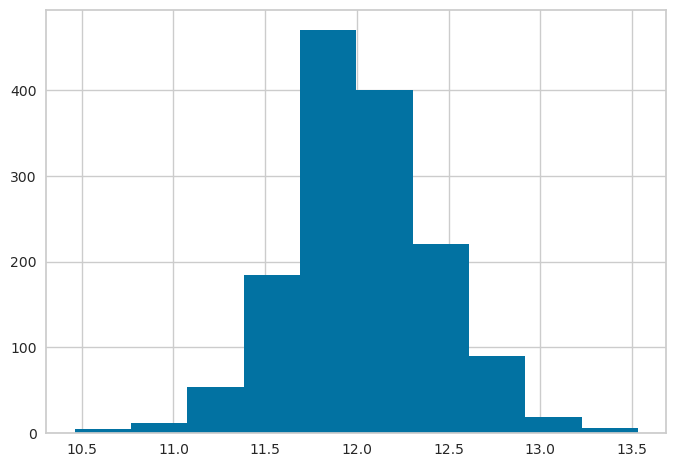

In [24]:
# Target transformation

log_target = np.log(target)
log_target.hist()

In [25]:
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [26]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
test_data.shape

(1459, 80)

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [29]:
# Change type of 'MSSubClass' from numerical to categorical

test_data['MSSubClass'] = test_data['MSSubClass'].astype(str)

In [30]:
# Split data into categorical, numerical and Id and remove Id

id = test_data['Id']
test_data = test_data.drop('Id', axis=1)
test_num = test_data.select_dtypes(np.number)
test_cat = test_data.select_dtypes('object')

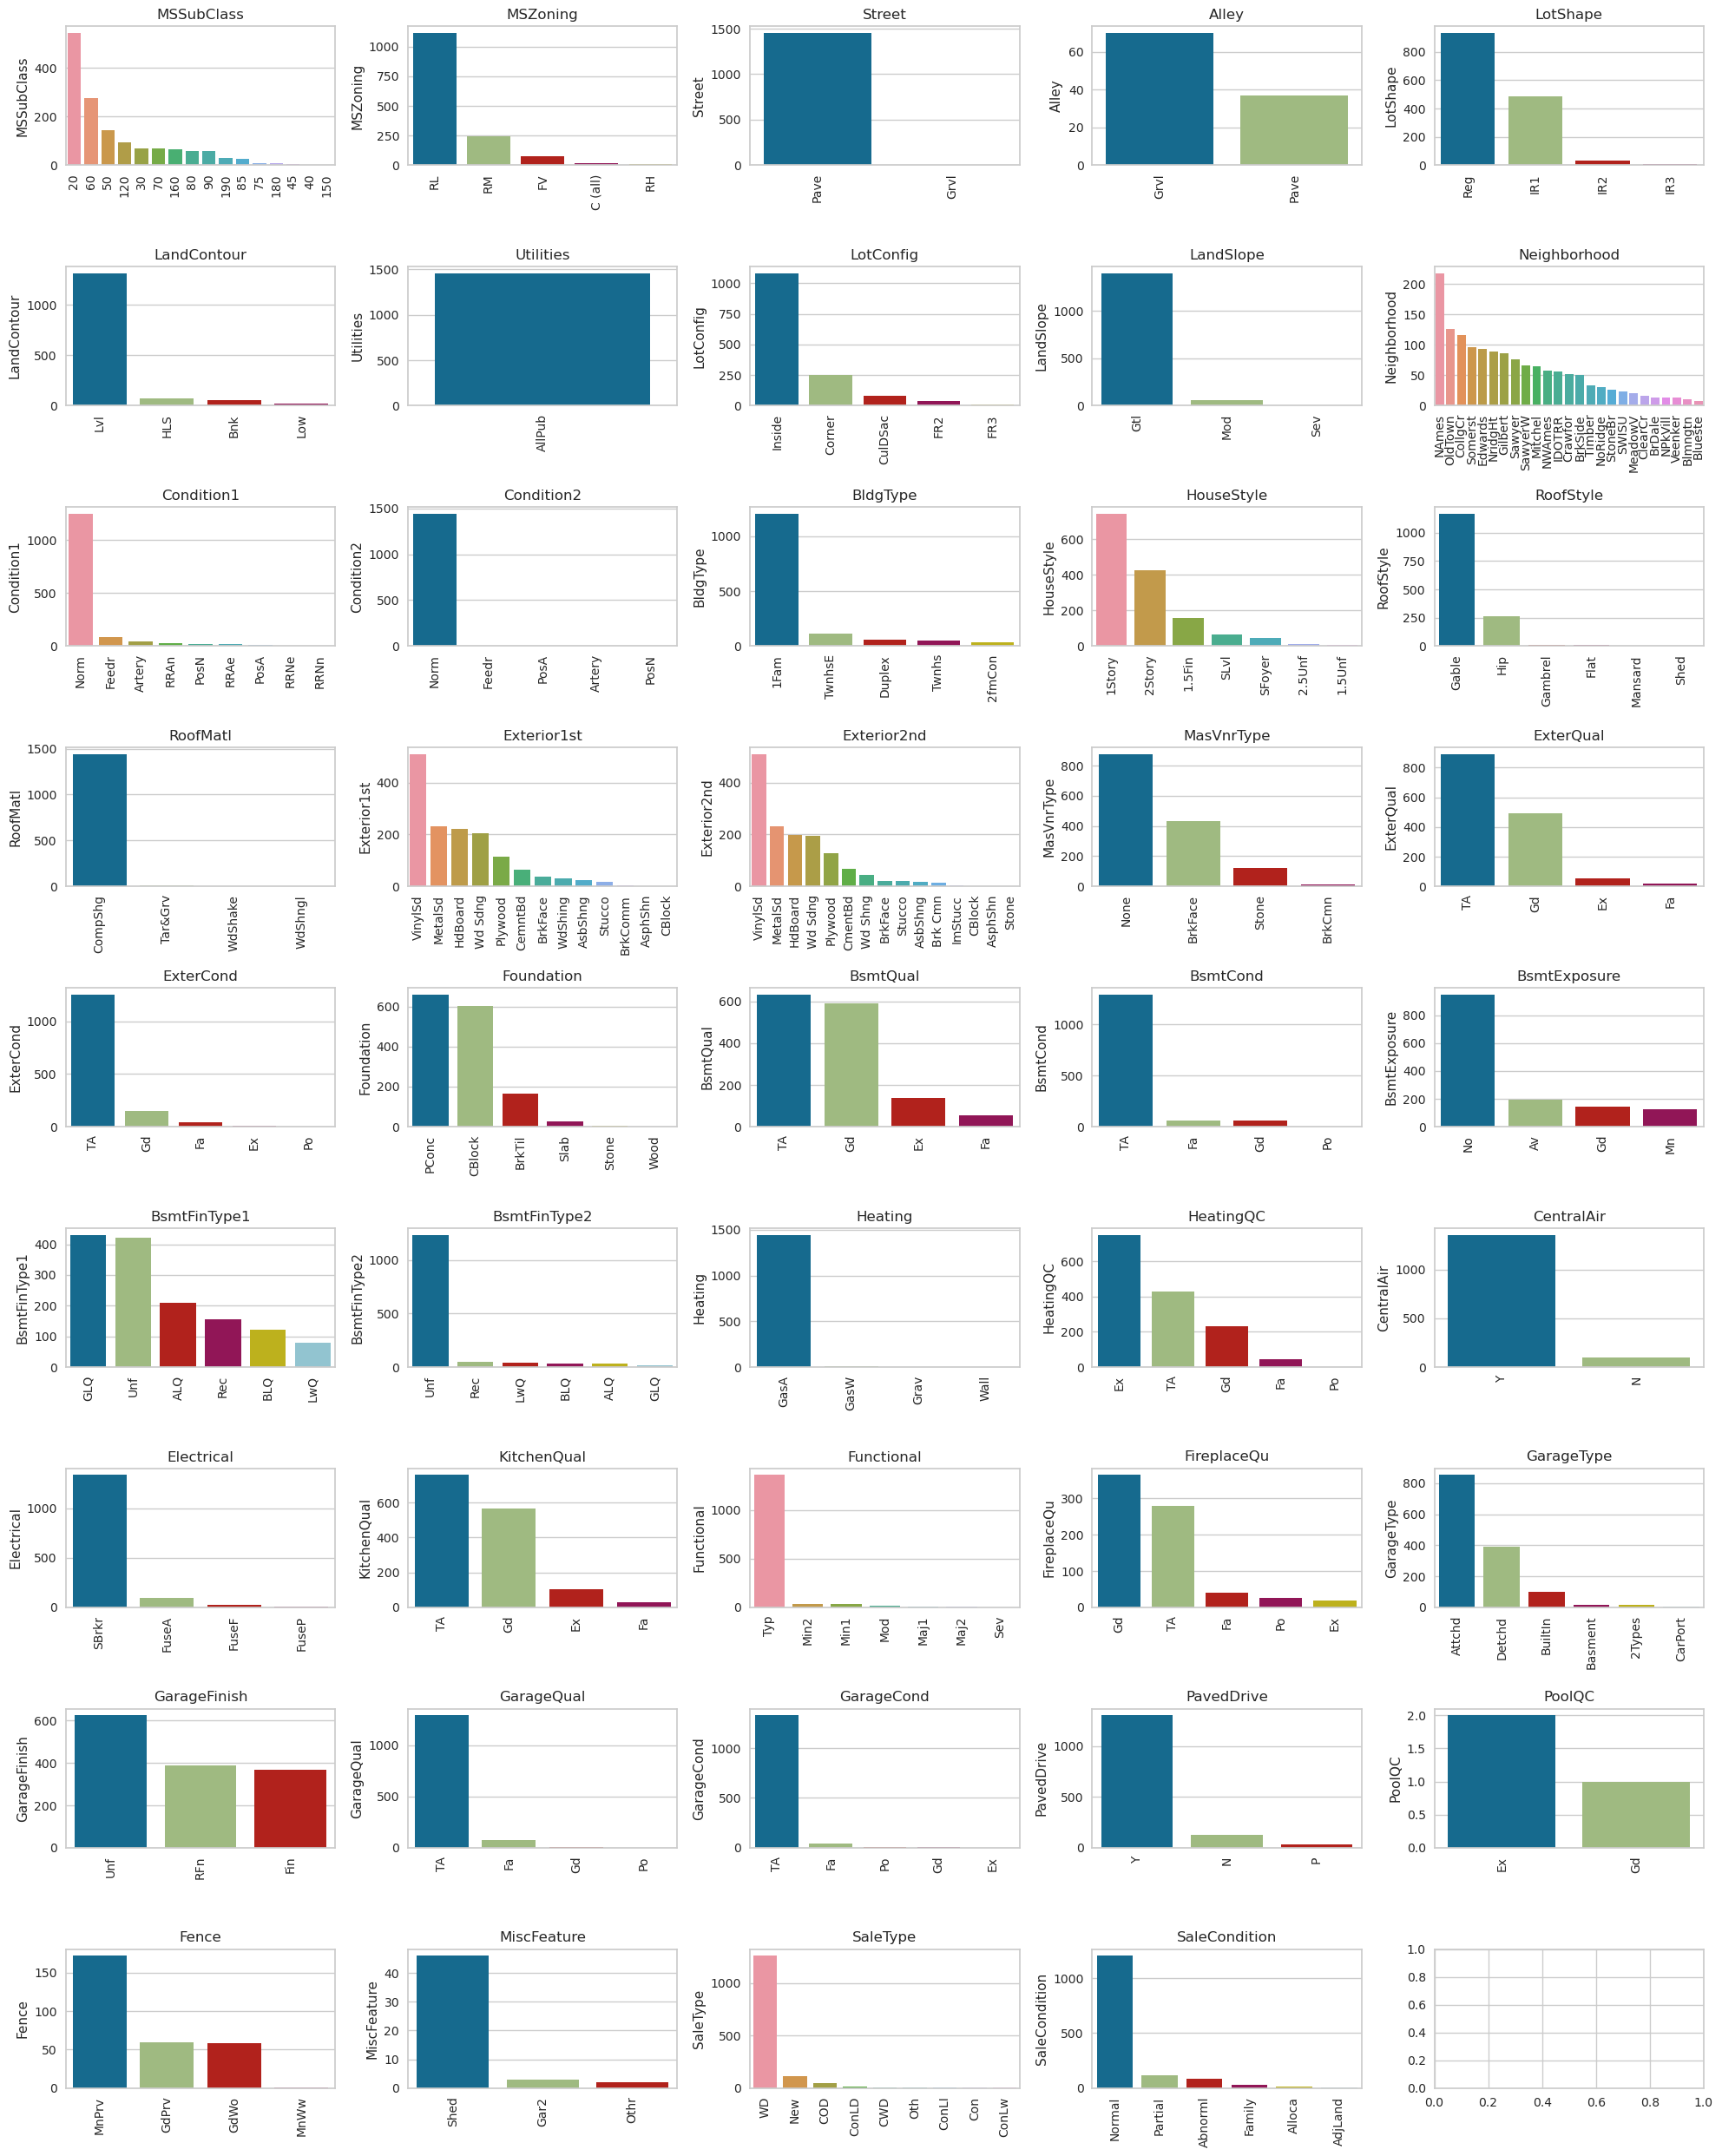

In [31]:
# Visulize the categorical data

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(20, 25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)


for i, column in enumerate(test_cat):
    ax = axes[i // 5, i % 5]
    sns.barplot(data=test_cat, x=test_cat[column].value_counts().index, y=test_cat[column].value_counts(), ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_title(column)

plt.tight_layout()
plt.show()

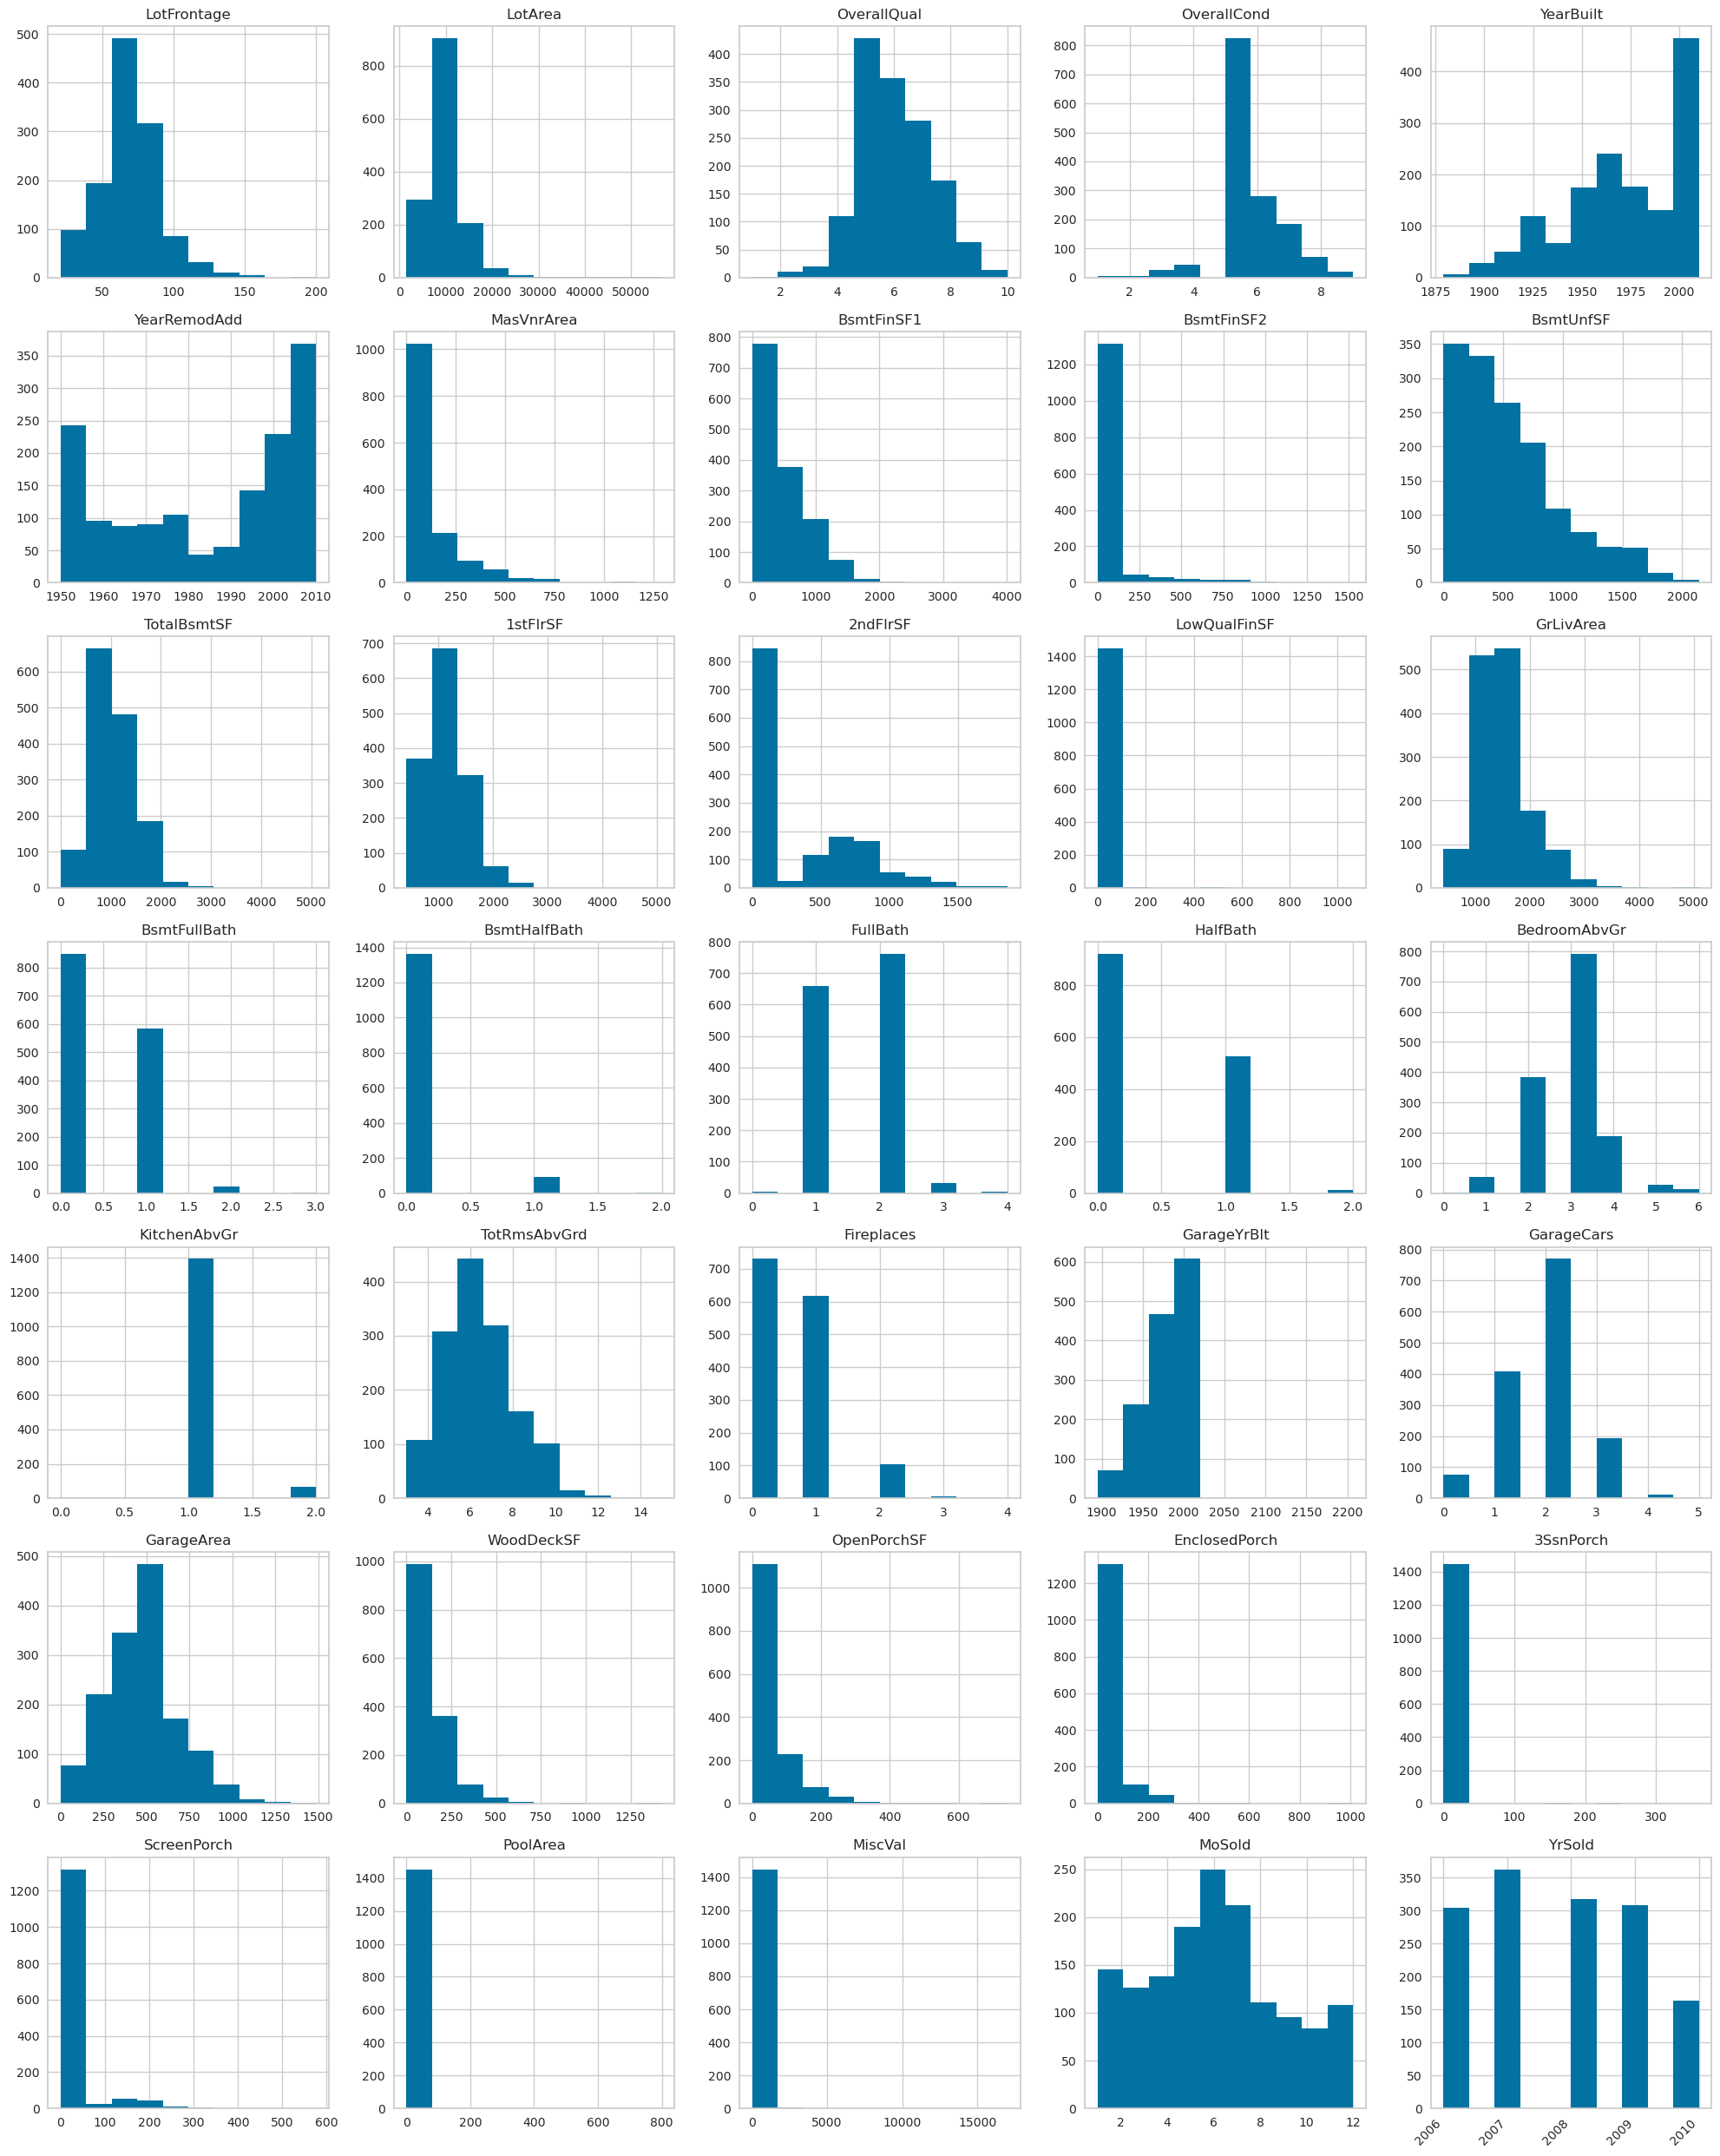

In [32]:
# Visulize the numerical data

fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

for i, column in enumerate(test_num):
    ax = axes[i // 5, i % 5]
    test_num[column].hist(bins=10, ax=ax)
    ax.set_title(column)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [33]:
# Extract columns with missing values

pd.set_option('display.max_rows', None)
cols_with_missing_values = test_data.columns[test_data.isna().any()]
test_data[cols_with_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   LotFrontage   1232 non-null   float64
 2   Alley         107 non-null    object 
 3   Utilities     1457 non-null   object 
 4   Exterior1st   1458 non-null   object 
 5   Exterior2nd   1458 non-null   object 
 6   MasVnrType    1443 non-null   object 
 7   MasVnrArea    1444 non-null   float64
 8   BsmtQual      1415 non-null   object 
 9   BsmtCond      1414 non-null   object 
 10  BsmtExposure  1415 non-null   object 
 11  BsmtFinType1  1417 non-null   object 
 12  BsmtFinSF1    1458 non-null   float64
 13  BsmtFinType2  1417 non-null   object 
 14  BsmtFinSF2    1458 non-null   float64
 15  BsmtUnfSF     1458 non-null   float64
 16  TotalBsmtSF   1458 non-null   float64
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

In [34]:
# Check info of categorical data (missing values)

cols_with_missing_values = test_cat.columns[test_cat.isna().any()]
test_cat[cols_with_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1455 non-null   object
 1   Alley         107 non-null    object
 2   Utilities     1457 non-null   object
 3   Exterior1st   1458 non-null   object
 4   Exterior2nd   1458 non-null   object
 5   MasVnrType    1443 non-null   object
 6   BsmtQual      1415 non-null   object
 7   BsmtCond      1414 non-null   object
 8   BsmtExposure  1415 non-null   object
 9   BsmtFinType1  1417 non-null   object
 10  BsmtFinType2  1417 non-null   object
 11  KitchenQual   1458 non-null   object
 12  Functional    1457 non-null   object
 13  FireplaceQu   729 non-null    object
 14  GarageType    1383 non-null   object
 15  GarageFinish  1381 non-null   object
 16  GarageQual    1381 non-null   object
 17  GarageCond    1381 non-null   object
 18  PoolQC        3 non-null      object
 19  Fence 

In [35]:
# Replace missing values with 'None' in the categorical data

for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'  
]:
    test_data[column] = test_data[column].replace(np.nan, 'None')
    
# Replace missing values with most frequent value in the categorical data

for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'KitchenQual',
    'SaleType',
    'Functional'
]:
    test_data[column] = test_data[column].fillna(test_data[column].mode()[0])
    
test_data.select_dtypes('object').isna().sum().sum()

0

In [36]:
# Check info of numerical data (missing values)

test_num.isna().sum()

LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [37]:
for column in [
    'MasVnrArea',
    'GarageYrBlt',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageCars',
    'GarageArea'
]:
     
    test_data = knn_imp(test_data, column)

In [38]:
# Address LotFrontage missing values

# Sort data by Area and impute the missing values in Frontage using the mean of 2 values before and 2 values after

test_data = test_data.sort_values(by='LotArea')
test_data['LotFrontage' + '_imputed'] = test_data['LotFrontage']

for i in test_data[test_data['LotFrontage'].isna()].index:    
    if (i > 0) and (i < len(test_data)-1):        
        mean_value = np.mean([test_data['LotFrontage'][i-1], test_data['LotFrontage'][i+1]])        
        test_data['LotFrontage' + '_imputed'][i] = mean_value
test_data['LotFrontage'] = test_data['LotFrontage' + '_imputed']
test_data = test_data.drop(columns=['LotFrontage' + '_imputed'])

print(test_data['LotFrontage'].isna().value_counts())

False    1359
True      100
Name: LotFrontage, dtype: int64


In [39]:
pd.set_option('display.max_rows', 10)

for column in test_data.LotFrontage:
    
    # Fill missing values with the previous non-missing value
    
    test_data['LotFrontage'].fillna(method='ffill', inplace=True)
    
print(test_data['LotFrontage'].isna().value_counts())

False    1459
Name: LotFrontage, dtype: int64


In [40]:
# # Address the rest of the numerical missing values

# # Replace the missing values in GarageYrBlt with values from YearBuilt

# test_data['GarageYrBlt'].fillna(0, inplace=True)

# # Replace the missing values in MasVnrArea with 0
    
# test_data['MasVnrArea'].fillna(0, inplace=True)

In [41]:
# # Extract the missing values from a data frame while preserving all the information in the same rows

# missing_values = test_data[test_data.isnull().values]
# missing_values

In [42]:
# # Replacing remaining numerical missing values with mode

# for i in [
#     'BsmtFinSF1',
#     'BsmtFinSF2',
#     'BsmtUnfSF',
#     'TotalBsmtSF',
#     'BsmtFullBath',
#     'BsmtHalfBath',
#     'GarageCars',
#     'GarageArea'
# ]:
#     test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

# test_data.isna().sum().sum()

               LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.554493     0.171754    -0.061984   0.109883   
LotArea           0.554493  1.000000     0.107989    -0.103402   0.048314   
OverallQual       0.171754  0.107989     1.000000    -0.095874   0.621910   
OverallCond      -0.061984 -0.103402    -0.095874     1.000000  -0.361027   
YearBuilt         0.109883  0.048314     0.621910    -0.361027   1.000000   
YearRemodAdd      0.075067  0.036907     0.591267     0.021668   0.631696   
MasVnrArea        0.230809  0.189142     0.453205    -0.144181   0.310818   
BsmtFinSF1        0.202506  0.185781     0.323002    -0.055313   0.309875   
BsmtFinSF2        0.059697  0.054346    -0.027883     0.042818  -0.008001   
BsmtUnfSF         0.061444  0.071461     0.242511    -0.139505   0.111645   
TotalBsmtSF       0.292787  0.283170     0.560243    -0.177399   0.425532   
1stFlrSF          0.433542  0.456417     0.481842    -0.170451   0.338733   

<AxesSubplot:>

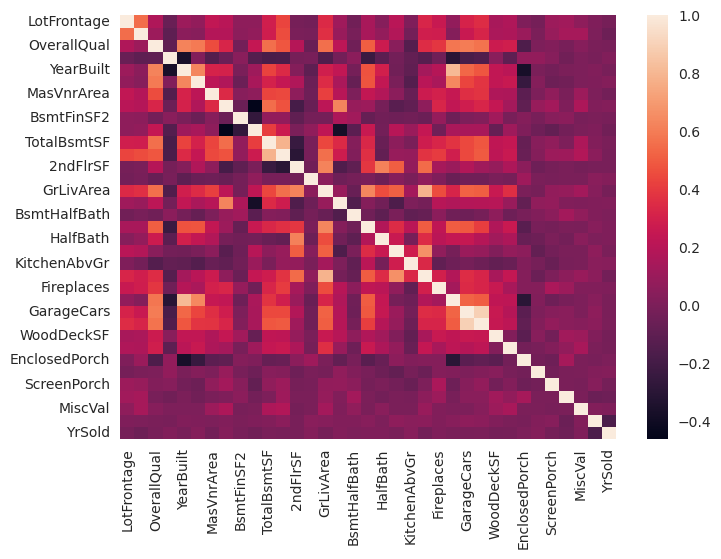

In [43]:
# Check the correlation between the numerical data

pd.set_option('display.max_rows', 37)
import seaborn as sns
print(test_data.select_dtypes(np.number).corr())
sns.heatmap(test_data.select_dtypes(np.number).corr())

In [44]:
# Check if the numerical data is skewed

test_skew = pd.DataFrame(abs(test_data.select_dtypes(np.number).skew()))
print(test_skew)
test_to_be_transformed = []

for index,row in test_skew.iterrows():
    if row[0] >= 0.5:
        test_to_be_transformed.append(index) 
test_to_be_transformed

                       0
LotFrontage     0.588343
LotArea         3.115217
OverallQual     0.181196
OverallCond     0.449165
YearBuilt       0.587657
YearRemodAdd    0.399906
MasVnrArea      2.537266
BsmtFinSF1      1.166686
BsmtFinSF2      4.042954
BsmtUnfSF       0.919362
TotalBsmtSF     0.814468
1stFlrSF        1.558195
2ndFlrSF        0.912883
LowQualFinSF   16.167254
GrLivArea       1.130402
BsmtFullBath    0.650317
BsmtHalfBath    3.782976
FullBath        0.295839
HalfBath        0.714728
BedroomAbvGr    0.436623
KitchenAbvGr    4.079055
TotRmsAbvGrd    0.842597
Fireplaces      0.819858
GarageYrBlt     0.129418
GarageCars      0.107770
GarageArea      0.299793
WoodDeckSF      2.130760
OpenPorchSF     2.687779
EnclosedPorch   4.669172
3SsnPorch      12.524216
ScreenPorch     3.788244
PoolArea       20.196888
MiscVal        20.075188
MoSold          0.183022
YrSold          0.168986


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [45]:
for i in [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'HalfBath',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
]:
    test_data[i] = np.log1p(test_data[i])

In [46]:
# Concatenate the train and test sets
concatenated = pd.concat([train_data, test_data])

# Apply one-hot encoding to the concatenated set
encoded = pd.get_dummies(concatenated)

In [47]:
# Scale data

scaler = StandardScaler()
scaler.fit(encoded)
X_scaled = scaler.transform(encoded)
encoded = pd.DataFrame(X_scaled, index=encoded.index, columns = encoded.columns)
encoded

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Fun

In [48]:
# Split the encoded set back into train and test sets

train_encoded = encoded[:len(train_data)]
test_encoded = encoded[len(train_data):]

In [49]:
# Join train data and log_target

data = train_encoded.join(log_target)
data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Fun

In [50]:
setup(data, target='SalePrice')

,Description,Value
0,Session id,566
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 318)"
4,Transformed data shape,"(1460, 318)"
5,Transformed train set shape,"(1021, 318)"
6,Transformed test set shape,"(439, 318)"
7,Numeric features,317
8,Preprocess,True
9,Imputation type,simple


In [51]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0833,0.0165,0.1256,0.8938,0.0098,0.0070,4.7810
br,Bayesian Ridge,0.0898,0.0181,0.1335,0.8821,0.0104,0.0075,0.1300
omp,Orthogonal Matching Pursuit,0.0907,0.0186,0.1341,0.8801,0.0104,0.0076,0.0630
gbr,Gradient Boosting Regressor,0.0915,0.0189,0.1352,0.8771,0.0105,0.0077,0.4400
lightgbm,Light Gradient Boosting Machine,0.0927,0.0195,0.1376,0.8741,0.0107,0.0078,0.7000
ridge,Ridge Regression,0.0947,0.0209,0.1432,0.8637,0.0111,0.0079,0.0710
xgboost,Extreme Gradient Boosting,0.1014,0.0219,0.1462,0.8605,0.0114,0.0085,0.8700
rf,Random Forest Regressor,0.0994,0.0224,0.1480,0.8550,0.0115,0.0083,1.0000
et,Extra Trees Regressor,0.1056,0.0245,0.1549,0.8434,0.0121,0.0088,1.1090
ada,AdaBoost Regressor,0.1338,0.0324,0.1792,0.7887,0.0139,0.0112,0.3510


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [52]:
# Assign X and y

X_train = train_encoded
y_train = log_target
X_test = test_encoded

In [53]:
# Create base models
catboost = create_model('catboost')
br = create_model('br')
gbr = create_model('gbr')

# Create stacking ensemble model
stack = stack_models(estimator_list=[catboost, br, gbr], meta_model=catboost)

# Evaluate the model
evaluate_model(stack)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0852,0.0165,0.1285,0.8725,0.0100,0.0072
1,0.0812,0.0181,0.1345,0.8735,0.0106,0.0068
2,0.0870,0.0170,0.1304,0.8580,0.0102,0.0074
3,0.0651,0.0078,0.0883,0.9503,0.0068,0.0054
4,0.0991,0.0338,0.1839,0.7985,0.0140,0.0083
5,0.0784,0.0115,0.1070,0.9280,0.0083,0.0066
6,0.0715,0.0101,0.1005,0.9249,0.0078,0.0060
7,0.0921,0.0185,0.1359,0.9173,0.0108,0.0078
8,0.0789,0.0104,0.1018,0.9262,0.0079,0.0066


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0976,0.0175,0.1324,0.8644,0.0102,0.0081
1,0.0815,0.0161,0.1269,0.8875,0.0100,0.0068
2,0.0868,0.0190,0.1379,0.8411,0.0108,0.0073
3,0.0731,0.0097,0.0985,0.9382,0.0076,0.0061
4,0.0910,0.0247,0.1573,0.8525,0.0118,0.0076
5,0.0968,0.0253,0.1591,0.8411,0.0122,0.0080
6,0.0912,0.0147,0.1211,0.8908,0.0095,0.0076
7,0.1006,0.0203,0.1424,0.9091,0.0113,0.0085
8,0.0826,0.0133,0.1152,0.9054,0.0090,0.0069


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0933,0.0190,0.1378,0.8532,0.0108,0.0078
1,0.0877,0.0190,0.1377,0.8675,0.0108,0.0073
2,0.0963,0.0211,0.1453,0.8238,0.0113,0.0081
3,0.0732,0.0095,0.0976,0.9393,0.0076,0.0061
4,0.1060,0.0366,0.1912,0.7820,0.0145,0.0088
5,0.0790,0.0111,0.1053,0.9304,0.0082,0.0066
6,0.0881,0.0150,0.1226,0.8881,0.0096,0.0074
7,0.1021,0.0217,0.1474,0.9026,0.0117,0.0086
8,0.0904,0.0133,0.1153,0.9053,0.0089,0.0075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0785,0.0152,0.1232,0.8826,0.0096,0.0066
1,0.0814,0.0172,0.1313,0.8796,0.0103,0.0068
2,0.0878,0.0177,0.1330,0.8523,0.0104,0.0074
3,0.0632,0.0077,0.0877,0.9510,0.0068,0.0053
4,0.0963,0.0311,0.1763,0.8148,0.0134,0.0080
5,0.0814,0.0152,0.1233,0.9046,0.0095,0.0068
6,0.0730,0.0102,0.1012,0.9238,0.0079,0.0061
7,0.0930,0.0188,0.1369,0.9159,0.0107,0.0078
8,0.0798,0.0106,0.1029,0.9246,0.0080,0.0067


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [54]:
stack_final = finalize_model(stack)

In [55]:
predictions = predict_model(stack, data = X_test)

output = pd.DataFrame({'Id' : id, 'SalePrice' : np.exp(predictions['prediction_label'])})
output

,Id,SalePrice
0,1461,124901.210665
1,1462,156188.584197
2,1463,176696.837872
3,1464,181054.190392
4,1465,178292.843268
...,...,...
1454,2915,84290.032896
1455,2916,91695.186885
1456,2917,153994.372972
1457,2918,113756.302723


In [57]:
output.to_csv('submission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
